In [1]:
import latentvelo as ltv
import scanpy as sc
import scvelo as scv
import numpy as np
import torch as th
import anndata as ad

Global seed set to 0


In [2]:
adata = sc.read('../synthetic_datasets/synthetic_linear.h5ad')
adata.layers['rna_velocity'] = np.array(adata.layers['rna_velocity'].todense())

milestones = adata.uns['traj_progressions']['from'].values + '->' + adata.uns['traj_progressions']['to'].values

milestones = adata.uns['traj_progressions']['from'].values + '->' + adata.uns['traj_progressions']['to'].values
for i in range(len(milestones)):
    
    state = milestones[i]
    
    if state == 'sA->sB':
        milestones[i] = 'A'
    
    elif state == 'sB->sC':
        milestones[i] = 'B'
    
    elif state == 'sC->sEndC':
        milestones[i] = 'C'

adata.obs['milestone'] = milestones

Skip filtering by dispersion since number of variables are less than `n_top_genes`.
computing neighbors
    finished (0:00:10) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


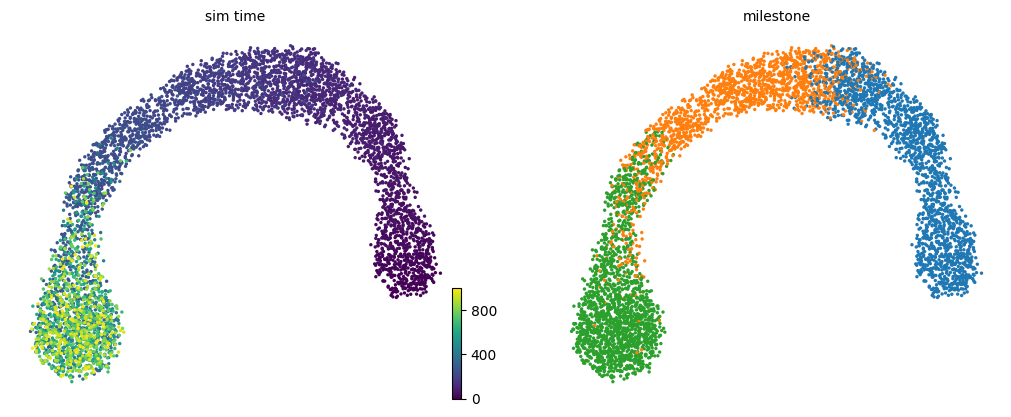

In [3]:


ltv.utils.standard_clean_recipe(adata, spliced_key='counts_spliced', unspliced_key='counts_unspliced',
                                 umap=True)
scv.pl.umap(adata, color=['sim_time', 'milestone'])



In [4]:
model = ltv.models.VAE(observed=51, latent_dim=20, zr_dim=1, h_dim=1)

In [5]:
epochs, val_ae, val_traj = ltv.train(model, adata, batch_size = 100,
                                      epochs=25, name='linear', grad_clip=100)

Warning, folder already exists. This may overwrite a previous fit.
27 velocity genes used
epoch 0, full loss 137.122, val loss 52.596, recon MSE 2.350, traj MSE 0.616, reg loss -2.021
epoch 1, full loss 83.817, val loss 10.090, recon MSE 2.224, traj MSE 0.589, reg loss -2.542
epoch 2, full loss 86.643, val loss -29.039, recon MSE 1.823, traj MSE 0.440, reg loss -3.167
epoch 3, full loss 129.406, val loss -65.958, recon MSE 1.343, traj MSE 0.364, reg loss -3.372
epoch 4, full loss 198.951, val loss -92.982, recon MSE 1.108, traj MSE 0.353, reg loss -3.456
epoch 5, full loss 238.948, val loss -107.534, recon MSE 0.878, traj MSE 0.340, reg loss -2.317
epoch 6, full loss 298.925, val loss -116.176, recon MSE 0.791, traj MSE 0.338, reg loss -2.332
epoch 7, full loss 370.340, val loss -121.333, recon MSE 0.747, traj MSE 0.342, reg loss -2.636
epoch 8, full loss 421.008, val loss -122.348, recon MSE 0.694, traj MSE 0.338, reg loss -2.620
epoch 9, full loss 482.409, val loss -122.526, recon MS

computing velocity graph (using 12/16 cores)


  0%|          | 0/5000 [00:00<?, ?cells/s]

    finished (0:00:04) --> added 
    'spliced_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'spliced_velocity_umap', embedded velocity vectors (adata.obsm)


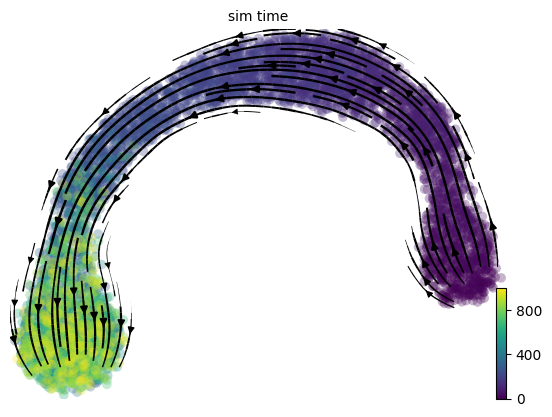

In [6]:
latent_adata, adata = ltv.output_results(model, adata, gene_velocity=True)

scv.tl.velocity_graph(latent_adata, vkey='spliced_velocity', n_jobs=12)
scv.pl.velocity_embedding_stream(latent_adata, vkey='spliced_velocity', color='sim_time')

# Perform benchmark

In [7]:
adata.layers['gene_velocity'] = adata.layers['velo'].copy()

cluster_edges = [('A', 'B'),
                 ('B', 'C')]

ltv.ev.format_benchmark_adata(adata, latent_adata, estimated_vkey='spliced_velocity')
results = ltv.ev.benchmark_synthetic(adata, estimated_vkey='gene_velocity', 
                                      sim_vkey='rna_velocity', 
                                      basis_list=['','latent','pca','pca_10', 'pca_3','umap'],
                                     cluster_edges = cluster_edges, cluster_key='milestone', avg_velocity=True)


adata.write('../benchmark/synthetic_trajectories/fits/linear_adata.h5ad')
latent_adata.write('../benchmark/synthetic_trajectories/fits/linear_latent_adata.h5ad')
results.to_csv('../benchmark/synthetic_trajectories/fits/linear_results_df.csv')

computing velocity embedding
    finished (0:00:02) --> added
    'spliced_velocity_pca', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'spliced_velocity_pca_20', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'spliced_velocity_pca_10', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'spliced_velocity_pca_3', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'spliced_velocity_umap', embedded velocity vectors (adata.obsm)
computing velocity graph (using 1/16 cores)


  0%|          | 0/5000 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'rna_velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'rna_velocity_latent', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:02) --> added
    'rna_velocity_pca', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'rna_velocity_pca_20', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'rna_velocity_pca_10', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'rna_velocity_pca_3', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'rna_velocity_umap', embedded velocity vectors (adata.obsm)
computing neighbors
    finished (0:00:01) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.